In [ ]:
import numpy as np 
import pandas as pd
import numpy as np
import os
import imutils
import dlib 
import cv2 
import imageio
from imutils import face_utils
from skimage.transform import resize
import time

In [ ]:
splits = '/content/drive/MyDrive/datasets/MIRACL-VC1/splits/'
X_train = np.load(splits + 'X_train.npy')
X_val = np.load(splits + 'X_val.npy')
X_test = np.load(splits + 'X_test.npy')
y_train = np.load(splits + 'y_train.npy')
y_val = np.load(splits + 'y_val.npy')
y_test = np.load(splits + 'y_test.npy')

In [ ]:
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# reshape layer
# shape = model.get_output_shape_at(0)
shape = model.layers[-1].output_shape
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))


# LSTMS - Recurrent Network Layer
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))

model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 98, 98, 32)    896       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 49, 49, 32)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 47, 47, 64)     55360     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 23, 23, 64)    0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 2, 21, 21, 128)    221312    
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 1, 10, 10, 128)   0

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 16)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
75/75 [==============================] - 23s 146ms/step - loss: 2.3104 - accuracy: 0.0892 - val_loss: 2.3012 - val_accuracy: 0.1150
Epoch 2/45
75/75 [==============================] - 10s 134ms/step - loss: 2.3034 - accuracy: 0.1075 - val_loss: 2.2618 - val_accuracy: 0.1200
Epoch 3/45
75/75 [==============================] - 10s 134ms/step - loss: 2.2782 - accuracy: 0.1450 - val_loss: 2.3086 - val_accuracy: 0.1700
Epoch 4/45
75/75 [==============================] - 10s 134ms/step - loss: 2.1739 - accuracy: 0.2058 - val_loss: 2.1391 - val_accuracy: 0.2550
Epoch 5/45
75/75 [==============================] - 10s 135ms/step - loss: 1.7566 - accuracy: 0.3675 - val_loss: 1.7377 - val_accuracy: 0.3950
Epoch 6/45
75/75 [==============================] - 10s 135ms/step - loss: 1.3908 - accuracy: 0.5117 - val_loss: 1.6593 - val_accuracy: 0.3800
Epoch 7/45
75/75 [==============================] - 10s 136ms/step - loss: 1.0984 - accuracy: 0.6183 - val_loss: 1.5675 - val_accuracy: 0.4650

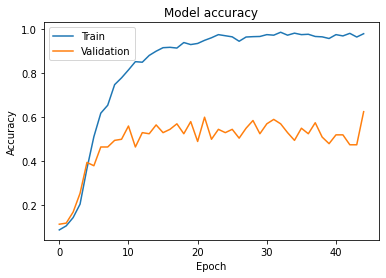

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/models/lstm_adagrad_e45_bc16/model.h5')
model.save_weights('/content/drive/MyDrive/models/lstm_adagrad_e45_bc16/model_weights.h5')

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# reshape layer
# shape = model.get_output_shape_at(0)
shape = model.layers[-1].output_shape
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))


# LSTMS - Recurrent Network Layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.3))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.3))


model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()